In [53]:
import time
from datetime import datetime

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from collections import Counter
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler


%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# DataFarame

In [3]:
df = pd.read_csv('/content/drive/MyDrive/DATA/dataset.csv')

In [4]:
df.head()

,Unnamed: 0,cmlt_daily_game_currency,cmlt_seconds_with_us,cmlt_max_sessions_duration,cmlt_sum_sessions_duration,cmlt_count_sessions,cmlt_sum_quantum_duration,cmlt_count_quant,cmlt_max_quantum_duration,cmlt_max_quant,...,cmlt_spent_hc_per_grind,cmlt_spent_hc_div_active_time,cmlt_seconds_div_active_time,cmlt_hard_med_spent,birthday,sex,is_cheater,has_email,time_confirm_email,target_game_currency
0,0,0.0,0,117,234,2,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.0
1,1,0.0,125,668,668,1,1448,4,271,28,...,0.000000,0.000000,62.500000,0.000000,NaN,NaN,False,False,NaN,0.0
2,2,0.0,14070,4137,15551,12,41220,119,796,275,...,0.298507,0.298507,210.000000,2.857143,1935-10-22,female,False,False,NaN,0.0
3,3,0.0,0,290,290,1,176,2,44,3,...,0.000000,0.000000,0.000000,0.000000,1987-08-08,female,False,True,NaN,0.0
4,4,0.0,887,1002,1002,1,2448,12,123,121,...,0.000000,0.000000,126.714286,0.000000,NaN,NaN,False,False,NaN,0.0


In [5]:
# create DataFrame for work
df_work = df.copy()

In [6]:
# remove column win number row
df_work = df_work.drop(['Unnamed: 0'], axis = 1)

In [7]:
# columns with type of values int and float
futures_number = df_work.select_dtypes(include=['int64', 'float64']).columns

In [8]:
df_work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250006 entries, 0 to 250005
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   cmlt_daily_game_currency       250006 non-null  float64
 1   cmlt_seconds_with_us           250006 non-null  int64  
 2   cmlt_max_sessions_duration     250006 non-null  int64  
 3   cmlt_sum_sessions_duration     250006 non-null  int64  
 4   cmlt_count_sessions            250006 non-null  int64  
 5   cmlt_sum_quantum_duration      250006 non-null  int64  
 6   cmlt_count_quant               250006 non-null  int64  
 7   cmlt_max_quantum_duration      250006 non-null  int64  
 8   cmlt_max_quant                 250006 non-null  int64  
 9   cmlt_final_level               250006 non-null  int64  
 10  cmlt_count_grind               250006 non-null  int64  
 11  cmlt_max_grind                 250006 non-null  int64  
 12  cmlt_count_won_grind          

In [9]:
# Size DataFrame
df_work.shape

(250006, 39)

In [10]:
#Count vlues not equel zero in each column
df.astype(bool).sum(axis=0)

Unnamed: 0                       250005
cmlt_daily_game_currency           4835
cmlt_seconds_with_us             187835
cmlt_max_sessions_duration       250006
cmlt_sum_sessions_duration       250006
cmlt_count_sessions              250006
cmlt_sum_quantum_duration        207246
cmlt_count_quant                 207246
cmlt_max_quantum_duration        207246
cmlt_max_quant                   207246
cmlt_final_level                 250006
cmlt_count_grind                 207246
cmlt_max_grind                   207246
cmlt_count_won_grind             206057
cmlt_hard_buy                      4727
cmlt_hard_earn                   166791
cmlt_hard_gift                   230864
cmlt_hard_spent                   79057
cmlt_hard_max_spent               79057
country                          250006
country_top_tier                 123327
network_name                     250006
date_install                     250006
first_command_time               250006
cmlt_time_4grind                 207246


In [11]:
#check unique values in each column
df.nunique()

Unnamed: 0                       250006
cmlt_daily_game_currency            576
cmlt_seconds_with_us              74344
cmlt_max_sessions_duration        16404
cmlt_sum_sessions_duration        45566
cmlt_count_sessions                 130
cmlt_sum_quantum_duration         37932
cmlt_count_quant                   1120
cmlt_max_quantum_duration          4806
cmlt_max_quant                     3027
cmlt_final_level                    119
cmlt_count_grind                    669
cmlt_max_grind                     3976
cmlt_count_won_grind                467
cmlt_hard_buy                       343
cmlt_hard_earn                      122
cmlt_hard_gift                       63
cmlt_hard_spent                     911
cmlt_hard_max_spent                 455
country                             216
country_top_tier                      2
network_name                         13
date_install                         90
first_command_time               245466
cmlt_time_4grind                  96448


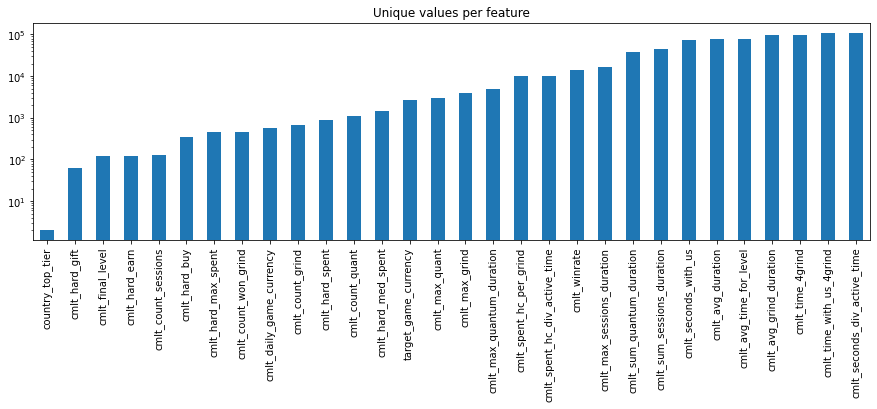

In [12]:
unique_values = df_work.select_dtypes(include="number").nunique().sort_values()

unique_values.plot.bar(logy=True, figsize=(15, 4), title="Unique values per feature");

In [13]:
# count NaN values in each column
df.isna().sum()

Unnamed: 0                            0
cmlt_daily_game_currency              0
cmlt_seconds_with_us                  0
cmlt_max_sessions_duration            0
cmlt_sum_sessions_duration            0
cmlt_count_sessions                   0
cmlt_sum_quantum_duration             0
cmlt_count_quant                      0
cmlt_max_quantum_duration             0
cmlt_max_quant                        0
cmlt_final_level                      0
cmlt_count_grind                      0
cmlt_max_grind                        0
cmlt_count_won_grind                  0
cmlt_hard_buy                         0
cmlt_hard_earn                        0
cmlt_hard_gift                        0
cmlt_hard_spent                       0
cmlt_hard_max_spent                   0
country                              56
country_top_tier                      0
network_name                      25156
date_install                          0
first_command_time                    0
cmlt_time_4grind                      0


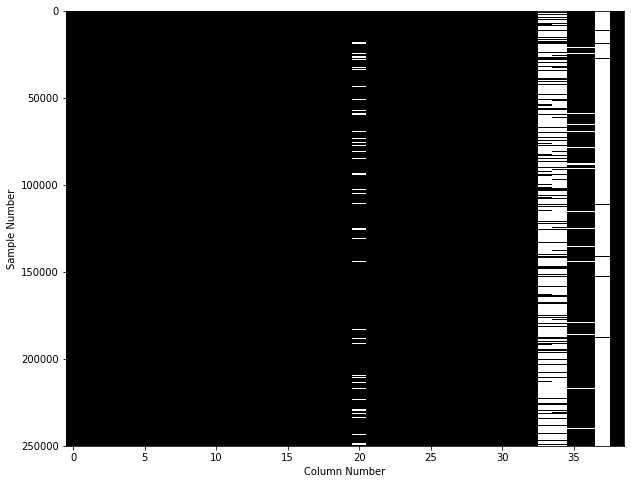

In [14]:
plt.figure(figsize=(10, 8))
plt.imshow(df_work.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number");

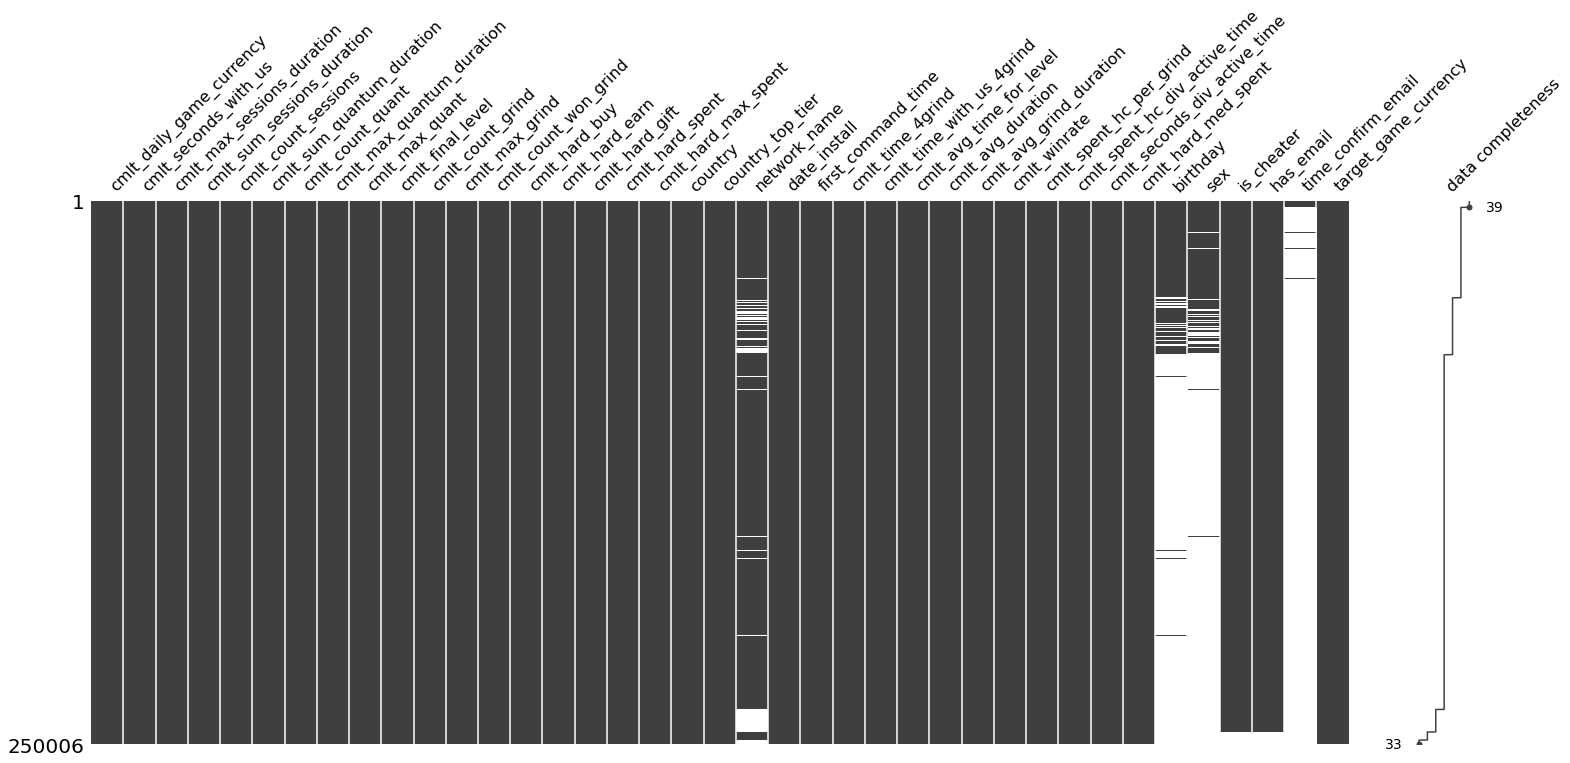

In [15]:
import missingno as msno

msno.matrix(df_work, labels=True, sort="descending");

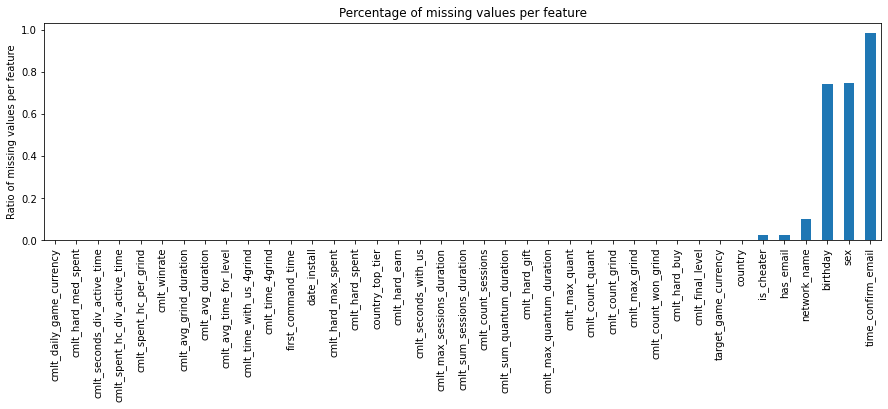

In [16]:
df_work.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature");

##### global view of the dataset

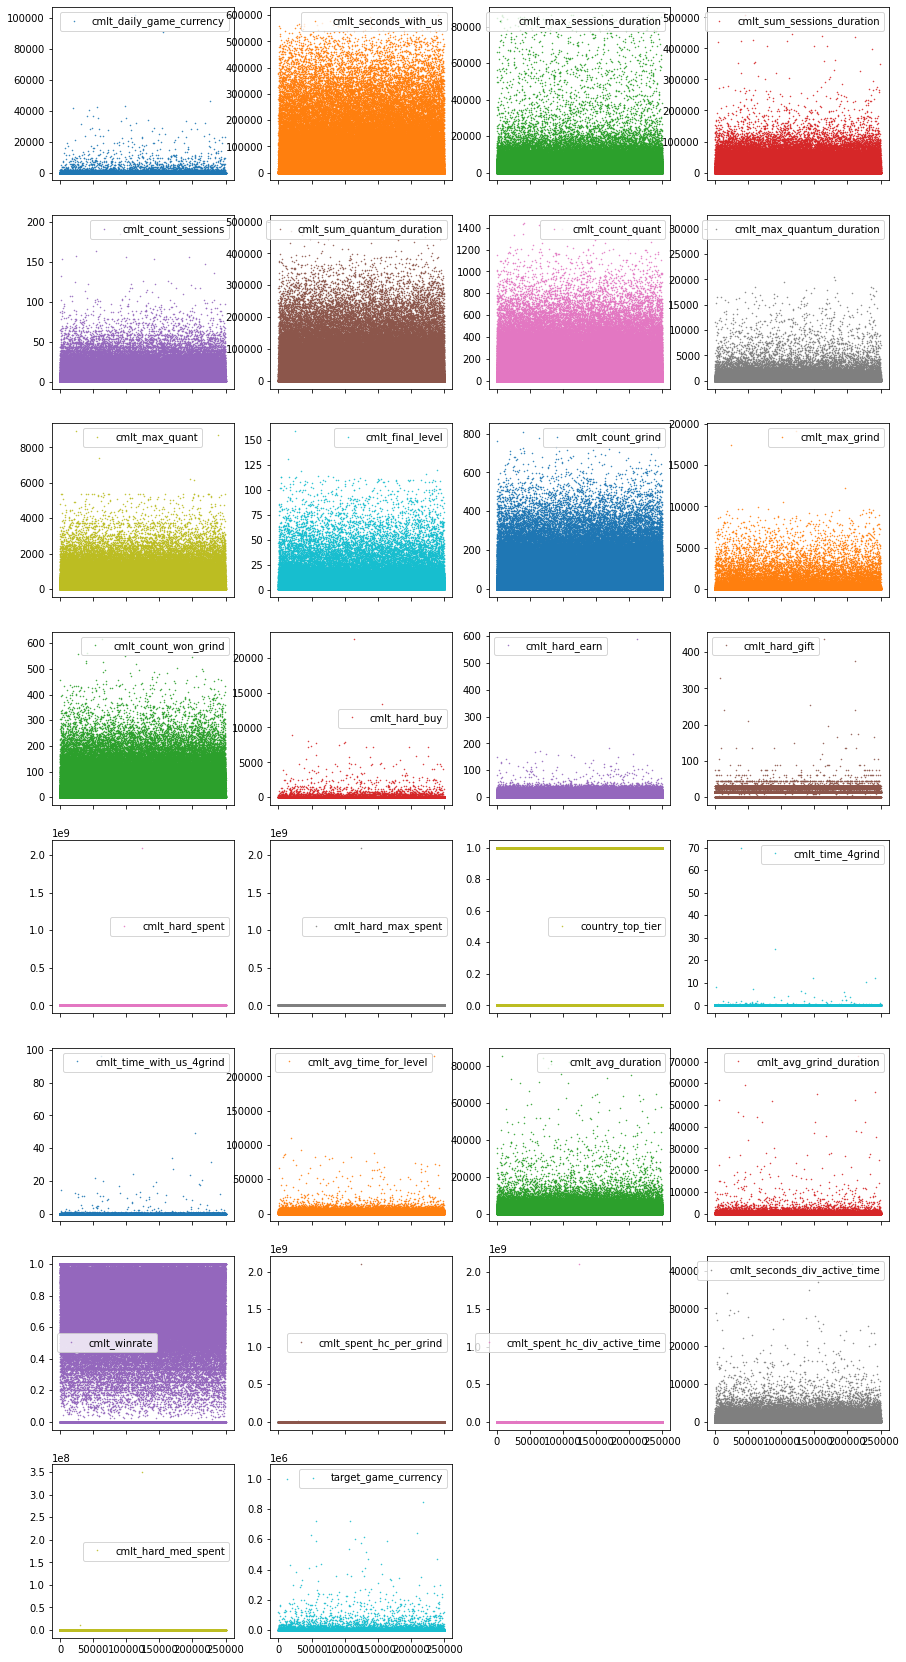

In [17]:
df_work.plot(lw=0, marker=".", subplots=True, layout=(-1, 4),
          figsize=(15, 30), markersize=1);

##### Feature distribution

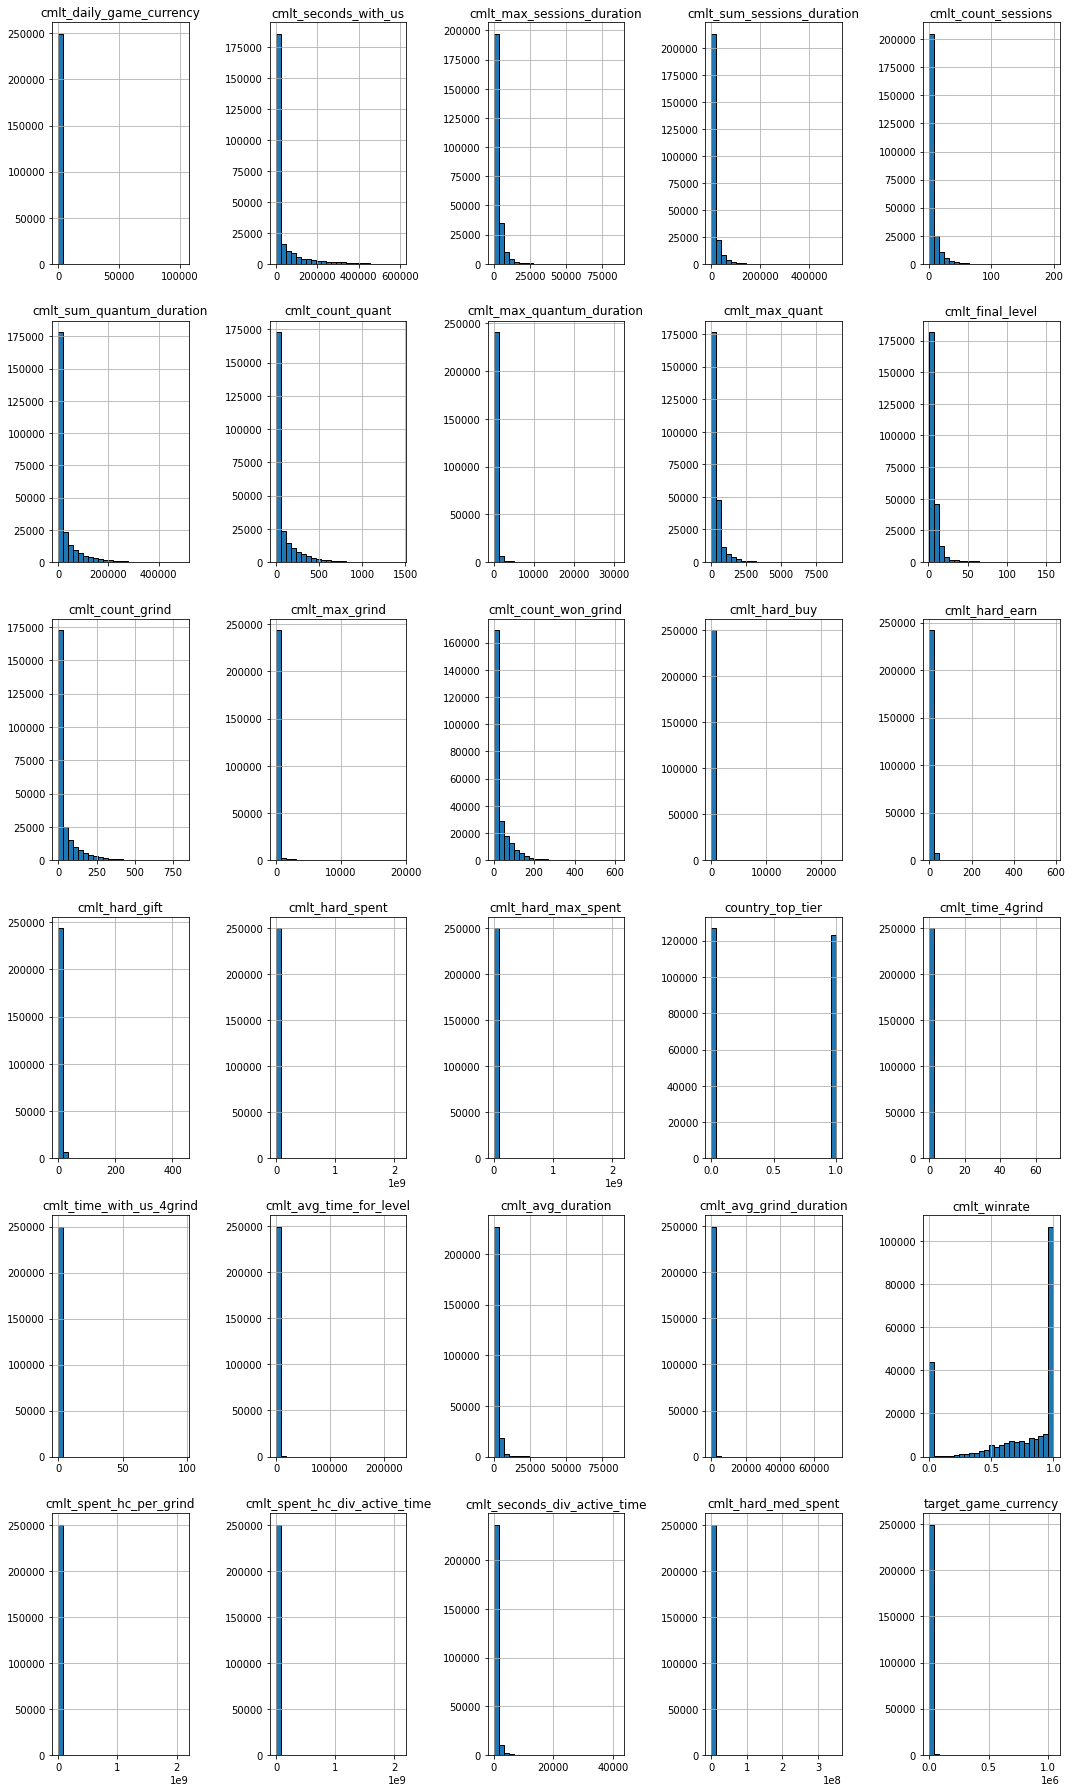

In [18]:
df_work.hist(bins=25, figsize=(15, 25), layout=(-1, 5), edgecolor="black")
plt.tight_layout();

#Data Preparation

### Prepare int and float

In [19]:
# remove columns with NaN values > 50%
df_work = df_work.drop(['birthday', 'sex', 'time_confirm_email'], axis=1)

In [20]:
# create dataframe where the prepared data will be stored
prepare_data = pd.DataFrame()

In [21]:
# columns with typee of values object
futures_object = df_work.select_dtypes(include=['object']).columns

In [22]:
# create dataframe with numbers 
X_num = df_work[futures_number]

In [23]:
#correlation Pirson
mask = np.zeros_like(X_num.corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

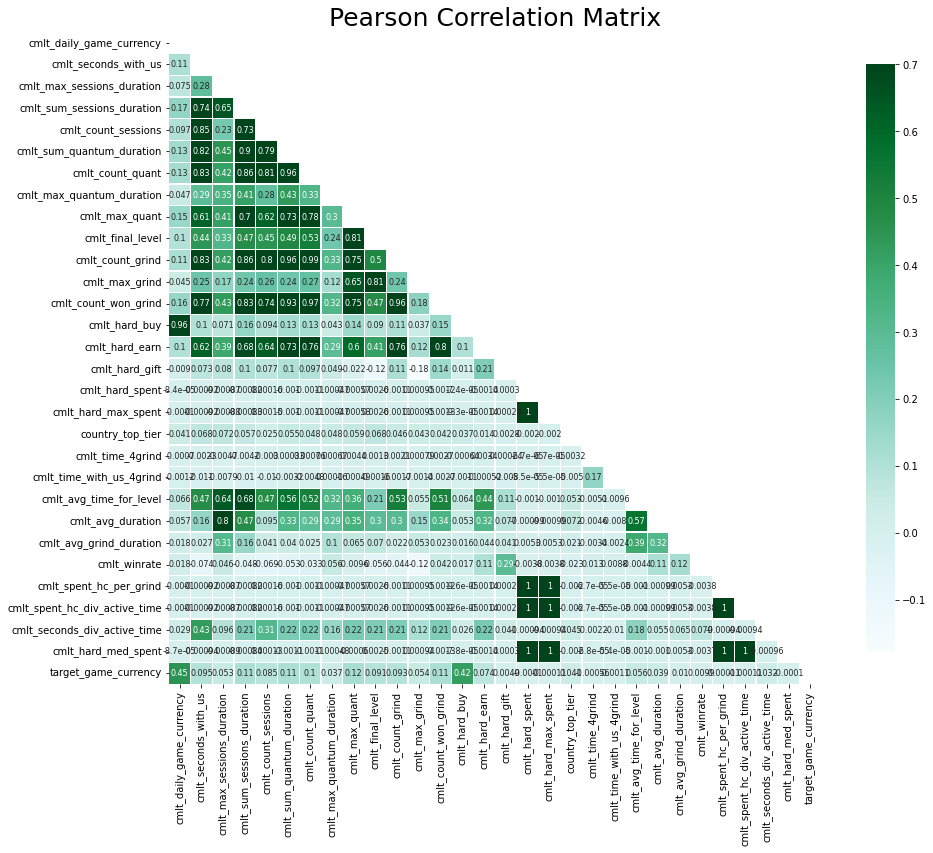

In [24]:
f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)


sns.heatmap(X_num.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

In [25]:
# remove target from X_num and create target
X_num = X_num.drop(['target_game_currency'], axis = 1)

y = df_work['target_game_currency']

In [26]:
# normalize number
scaler = MinMaxScaler()
scaler.fit(X_num)
scaled = scaler.fit_transform(X_num)
X_num_scaled = pd.DataFrame(scaled, columns = X_num.columns)

In [27]:
# add to DataFrame for analise
prepare_data = pd.concat([prepare_data, X_num_scaled])

In [28]:
del(X_num_scaled)

### Prepare data

In [29]:
# create DataFrame for data format
prepare_data_date = pd.DataFrame()

In [30]:
# delta install from 01/01/1970
prepare_data_date['date_install'] = pd.to_datetime(df_work['date_install']).astype(int)

In [31]:
# delta comand from 01/01/1970
prepare_data_date['data_first_command_time'] = pd.to_datetime(df_work['first_command_time']).astype(int)

In [32]:
# add to general dataframe
prepare_data = pd.concat([prepare_data, prepare_data_date], axis = 1)

In [33]:
del(prepare_data_date)

### Prepare Boolean data

##### for is_cheater

In [34]:
# find most popular value and fill NaN
cheat_count = df_work['is_cheater'].value_counts().index[0]
df_work['is_cheater'] = df_work['is_cheater'].fillna(cheat_count)

In [35]:
# add to general dataframe
prepare_data['is_cheater'] = (df_work['is_cheater'] != cheat_count).astype(int)

##### for has_email

In [36]:
# find most popular value and fill NaN
cheat_count = df_work['has_email'].value_counts().index[0]
df_work['has_email'] = df_work['has_email'].fillna(cheat_count)

In [37]:
# add to general dataframe
prepare_data['has_email'] = (df_work['has_email'] != cheat_count).astype(int)

### Prepare object columns

In [38]:
df_work_str = df_work[['country', 'network_name']].fillna('other')

In [39]:
# add to general dataframe
prepare_data = pd.concat([prepare_data, df_work_str], axis = 1)

In [40]:
del(df_work_str)

# Undersampling and Oversampling

### Undersampling 

In [42]:
not_zero_target = (df_work['target_game_currency'] > 0).astype(int)

df_for_res = prepare_data.copy()

df_for_res['target_game_currency'] = df_work['target_game_currency']

print('Original dataset shape %s' % Counter(not_zero_target))

rus = RandomUnderSampler(random_state=56)

X_res, y_res = rus.fit_resample(df_for_res, not_zero_target)

print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 240920, 1: 9086})
Resampled dataset shape Counter({0: 9086, 1: 9086})


In [43]:
y_usamp = X_res['target_game_currency']
X_usamp = X_res.drop(['target_game_currency'], axis = 1)

### Oversampling

In [44]:
not_zero_target = (df_work['target_game_currency'] > 0).astype(int)

df_for_res = prepare_data.copy()

df_for_res['target_game_currency'] = df_work['target_game_currency']

print('Original dataset shape %s' % Counter(not_zero_target))

rus = RandomOverSampler(random_state=56)

X_res, y_res = rus.fit_resample(df_for_res, not_zero_target)

print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 240920, 1: 9086})
Resampled dataset shape Counter({0: 240920, 1: 240920})


In [45]:
y_osamp = X_res['target_game_currency']
X_osamp = X_res.drop(['target_game_currency'], axis = 1)

# Machine Learning

### CatBoost

In [1]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [54]:
import math
from catboost import CatBoostRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [55]:
K = 5
kf = KFold(n_splits = K, random_state = 1, shuffle = True)
categorical_var = np.where(prepare_data.dtypes == np.object)[0]

In [ ]:
model_catboost = CatBoostRegressor(verbose=0, n_estimators=100)

In [ ]:
#function cross validation CatBoost

def cv_catboost(datafame, y, categorical_var = categorical_var):
  cum_MAE = 0
  cum_MSE = 0
  cum_RMSE = 0

  for i, (train_index, test_index) in enumerate(kf.split(datafame)):
      
      # Create data for this fold
      y_train, y_valid = y.iloc[train_index], y.iloc[test_index]
      X_train, X_valid = datafame.iloc[train_index,:], datafame.iloc[test_index,:]
      print( "\nFold ", i)
      
      # Run model for this fold     
      fit_model = model_catboost.fit( X_train, y_train, cat_features = categorical_var)
      
      print( "  N trees = ", model_catboost.tree_count_ )
          
      # Generate validation predictions for this fold
      pred = fit_model.predict(X_valid)
      mae = metrics.mean_absolute_error(y_valid, pred)
      mse = mean_squared_error(y_valid, pred)
      rmse = math.sqrt(mse)

      cum_MAE += mae
      cum_MSE += mse
      cum_RMSE += rmse
  print('Mean Absolute Error (MAE):', cum_MAE/K)
  print('Mean Square Error (MSE):', cum_MSE/K)
  print('Root Mean Square Error (RMSE):', cum_RMSE/K)

##### Usual Data

In [ ]:
%%time
cv_catboost(prepare_data, y, categorical_var)


Fold  0
  N trees =  100

Fold  1
  N trees =  100

Fold  2
  N trees =  100

Fold  3
  N trees =  100

Fold  4
  N trees =  100
Mean Absolute Error (MAE): 1543.1100970401158
Mean Square Error (MSE): 73376637.45596504
Root Mean Square Error (RMSE): 8559.830035963872
CPU times: user 1min 8s, sys: 1.94 s, total: 1min 10s
Wall time: 54.2 s


##### Undersampling

In [ ]:
%%time
cv_catboost(X_usamp, y_usamp, categorical_var)


Fold  0
  N trees =  100

Fold  1
  N trees =  100

Fold  2
  N trees =  100

Fold  3
  N trees =  100

Fold  4
  N trees =  100
Mean Absolute Error (MAE): 8405.613128733008
Mean Square Error (MSE): 901831720.617851
Root Mean Square Error (RMSE): 29983.3911328569
CPU times: user 12.7 s, sys: 344 ms, total: 13.1 s
Wall time: 6.96 s


#####Oversampling

In [ ]:
%%time
cv_catboost(X_osamp, y_osamp, categorical_var)


Fold  0
  N trees =  100

Fold  1
  N trees =  100

Fold  2
  N trees =  100

Fold  3
  N trees =  100

Fold  4
  N trees =  100
Mean Absolute Error (MAE): 4925.311693019621
Mean Square Error (MSE): 147691934.14503184
Root Mean Square Error (RMSE): 12151.051371115089
CPU times: user 2min 18s, sys: 1.32 s, total: 2min 19s
Wall time: 1min 16s


### XGBoost

In [264]:
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder

In [ ]:
enc = OneHotEncoder()

In [42]:
# prepare data for xgboost

def ohe_xgboost(dataframe):
  enc = OneHotEncoder()
  df_for_ohc = dataframe[['country', 'network_name']]
  enc.fit(df_for_ohc)
  x_cat = enc.transform(df_for_ohc)
  df_ohe = pd.DataFrame(x_cat.toarray(), columns = enc.get_feature_names())
  dataframe = dataframe.drop(['country', 'network_name'], axis=1)
  return(pd.concat([dataframe, df_ohe], axis=1))

Prepare data for XGBoost

In [ ]:
model_xgb = XGBRegressor()

In [ ]:
def cv_xgboost (datafame, y):
  cum_MAE = 0
  cum_MSE = 0
  cum_RMSE = 0

  for i, (train_index, test_index) in enumerate(kf.split(datafame)):
      
      # Create data for this fold
      y_train, y_valid = y.iloc[train_index], y.iloc[test_index]
      X_train, X_valid = datafame.iloc[train_index,:], datafame.iloc[test_index,:]
      print( "\nFold ", i)
      
      # Run model for this fold     
      fit_model = model_xgb.fit(X_train, y_train)
          
      # Generate validation predictions for this fold
      pred = fit_model.predict(X_valid)
      mae = metrics.mean_absolute_error(y_valid, pred)
      mse = mean_squared_error(y_valid, pred)
      rmse = math.sqrt(mse)

      cum_MAE += mae
      cum_MSE += mse
      cum_RMSE += rmse
      mae = metrics.mean_absolute_error(y_valid, pred)
      cum_MAE += mae
  print('Mean Absolute Error (MAE):', cum_MAE/K)
  print('Mean Square Error (MSE):', cum_MSE/K)
  print('Root Mean Square Error (RMSE):', cum_RMSE/K)

##### Usual Data

In [ ]:
%%time
df_xgboost = ohe_xgboost(prepare_data)

CPU times: user 1.98 s, sys: 1.28 s, total: 3.26 s
Wall time: 3.27 s


In [ ]:
%%time
cv_xgboost(df_xgboost, y)


Fold  0
[14:57:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

Fold  1
[14:59:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

Fold  2
[15:02:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

Fold  3
[15:04:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

Fold  4
[15:06:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Absolute Error (MAE): 1289.408277519576
Mean Square Error (MSE): 64241993.82769384
Root Mean Square Error (RMSE): 8001.296507446097
CPU times: user 10min 27s, sys: 3.68 s, total: 10min 31s
Wall time: 10min 37s


##### Undersampling

In [43]:
%%time
df_xgboost_usamp = ohe_xgboost(X_usamp)

CPU times: user 55.7 ms, sys: 0 ns, total: 55.7 ms
Wall time: 58.6 ms


In [ ]:
%%time
cv_xgboost(df_xgboost_usamp, y_usamp)


Fold  0
[15:08:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

Fold  1
[15:08:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

Fold  2
[15:08:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

Fold  3
[15:08:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

Fold  4
[15:08:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Absolute Error (MAE): 16329.402967079233
Mean Square Error (MSE): 898315432.5187995
Root Mean Square Error (RMSE): 29904.80882465578
CPU times: user 36.3 s, sys: 157 ms, total: 36.4 s
Wall time: 36.4 s


##### Oversampling

In [ ]:
%%time
df_xgboost_osamp = ohe_xgboost(X_osamp)

CPU times: user 3.78 s, sys: 20.9 ms, total: 3.8 s
Wall time: 3.81 s


In [ ]:
%%time
cv_xgboost(df_xgboost_osamp, y_osamp)


Fold  0
[15:08:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

Fold  1
[15:13:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

Fold  2
[15:17:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

Fold  3
[15:22:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

Fold  4
[15:26:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Absolute Error (MAE): 14163.804018335964
Mean Square Error (MSE): 488596143.2320727
Root Mean Square Error (RMSE): 22102.677885694204
CPU times: user 21min 32s, sys: 14.1 s, total: 21min 47s
Wall time: 21min 59s


# Normalize target 

> After using several machine learning algorithms, it was not possible to reduce the error, and also due to the large spread of the target variable, I decided to apply normalization to the target variable.

In [56]:
#normalize target
normalized_y_usampl=(y_usamp-y_usamp.mean())/y_usamp.std()

In [57]:
def different_model(datafame, y, model):
  cum_MAE = 0
  cum_MSE = 0
  cum_RMSE = 0

  for i, (train_index, test_index) in enumerate(kf.split(datafame)):
      
      # Create data for this fold
      y_train, y_valid = y.iloc[train_index], y.iloc[test_index]
      X_train, X_valid = datafame.iloc[train_index,:], datafame.iloc[test_index,:]
      print( "\nFold ", i)
      
      # Run model for this fold     
      fit_model = model.fit(X_train, y_train)
          
      # Generate validation predictions for this fold
      pred = fit_model.predict(X_valid)
      mae = metrics.mean_absolute_error(y_valid, pred)
      mse = mean_squared_error(y_valid, pred)
      rmse = math.sqrt(mse)

      cum_MAE += mae
      cum_MSE += mse
      cum_RMSE += rmse
      mae = metrics.mean_absolute_error(y_valid, pred)
      cum_MAE += mae
  print('Mean Absolute Error (MAE):', cum_MAE/K)
  print('Mean Square Error (MSE):', cum_MSE/K)
  print('Root Mean Square Error (RMSE):', cum_RMSE/K)

####Linear regression

In [ ]:
lr = LinearRegression()

In [268]:
# use df_xgboost
different_model(df_xgboost_usamp, normalized_y_usampl, lr)


Fold  0

Fold  1

Fold  2

Fold  3

Fold  4
Mean Absolute Error (MAE): 0.674615230140304
Mean Square Error (MSE): 1.0000402612691461
Root Mean Square Error (RMSE): 0.9968567057322633


####Ridge

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge_model = Ridge()

In [270]:
different_model(df_xgboost_usamp, normalized_y_usampl, ridge_model)


Fold  0

Fold  1

Fold  2

Fold  3

Fold  4
Mean Absolute Error (MAE): 0.548602407961031
Mean Square Error (MSE): 0.8106651301818637
Root Mean Square Error (RMSE): 0.8972975463889405


####Lasso

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso_model = Lasso()

In [271]:
different_model(df_xgboost_usamp, normalized_y_usampl, lasso_model)


Fold  0

Fold  1

Fold  2

Fold  3

Fold  4
Mean Absolute Error (MAE): 0.662553113205324
Mean Square Error (MSE): 0.9997445124896084
Root Mean Square Error (RMSE): 0.9963907854485617


####k-nearest neighbors

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
neigh = KNeighborsRegressor()

In [272]:
different_model(df_xgboost_usamp, normalized_y_usampl, neigh)


Fold  0

Fold  1

Fold  2

Fold  3

Fold  4
Mean Absolute Error (MAE): 0.7085960003479421
Mean Square Error (MSE): 1.204286903861976
Root Mean Square Error (RMSE): 1.0951818336923362


####Support Vector Regression

In [273]:
from sklearn.svm import SVR

In [274]:
svr_model = SVR()

In [275]:
different_model(df_xgboost_usamp, normalized_y_usampl, svr_model)


Fold  0

Fold  1

Fold  2

Fold  3

Fold  4
Mean Absolute Error (MAE): 0.5137363720489654
Mean Square Error (MSE): 1.0111543429807524
Root Mean Square Error (RMSE): 1.0020891316710951


####Decision Tree

In [277]:
from sklearn.tree import DecisionTreeRegressor

In [278]:
dtr = DecisionTreeRegressor()

In [279]:
different_model(df_xgboost_usamp, normalized_y_usampl, dtr)


Fold  0

Fold  1

Fold  2

Fold  3

Fold  4
Mean Absolute Error (MAE): 0.6457364186513036
Mean Square Error (MSE): 1.8099131652811817
Root Mean Square Error (RMSE): 1.3394468455732116


####Random Forest

In [280]:
from sklearn.ensemble import RandomForestRegressor

In [281]:
forest=RandomForestRegressor()

In [282]:
different_model(df_xgboost_usamp, normalized_y_usampl, forest)


Fold  0

Fold  1

Fold  2

Fold  3

Fold  4
Mean Absolute Error (MAE): 0.5483571262602982
Mean Square Error (MSE): 0.8930494185630643
Root Mean Square Error (RMSE): 0.9425253291821919


####CatBoost

In [58]:
model_catboost = CatBoostRegressor(verbose=False)

In [65]:
def cv_catboost(datafame, y, categorical_var = categorical_var):
  cum_MAE = 0
  cum_MSE = 0
  cum_RMSE = 0

  for i, (train_index, test_index) in enumerate(kf.split(datafame)):
      
      # Create data for this fold
      y_train, y_valid = y.iloc[train_index], y.iloc[test_index]
      X_train, X_valid = datafame.iloc[train_index,:], datafame.iloc[test_index,:]
      print( "\nFold ", i)
      
      # Run model for this fold     
      fit_model = model_catboost.fit( X_train, y_train, cat_features = categorical_var)
      
      print( "  N trees = ", model_catboost.tree_count_ )
          
      # Generate validation predictions for this fold
      pred = fit_model.predict(X_valid)
      mae = metrics.mean_absolute_error(y_valid, pred)
      mse = mean_squared_error(y_valid, pred)
      rmse = math.sqrt(mse)

      cum_MAE += mae
      cum_MSE += mse
      cum_RMSE += rmse
  print('Mean Absolute Error (MAE):', cum_MAE/K)
  print('Mean Square Error (MSE):', cum_MSE/K)
  print('Root Mean Square Error (RMSE):', cum_RMSE/K)

#####Undersampling

In [71]:
cv_catboost(X_usamp, normalized_y_usampl, categorical_var)


Fold  0
  N trees =  1000

Fold  1
  N trees =  1000

Fold  2
  N trees =  1000

Fold  3
  N trees =  1000

Fold  4
  N trees =  1000
Mean Absolute Error (MAE): 0.2576291394335407
Mean Square Error (MSE): 0.8534013262771272
Root Mean Square Error (RMSE): 0.9211363112168826


Feature Importance

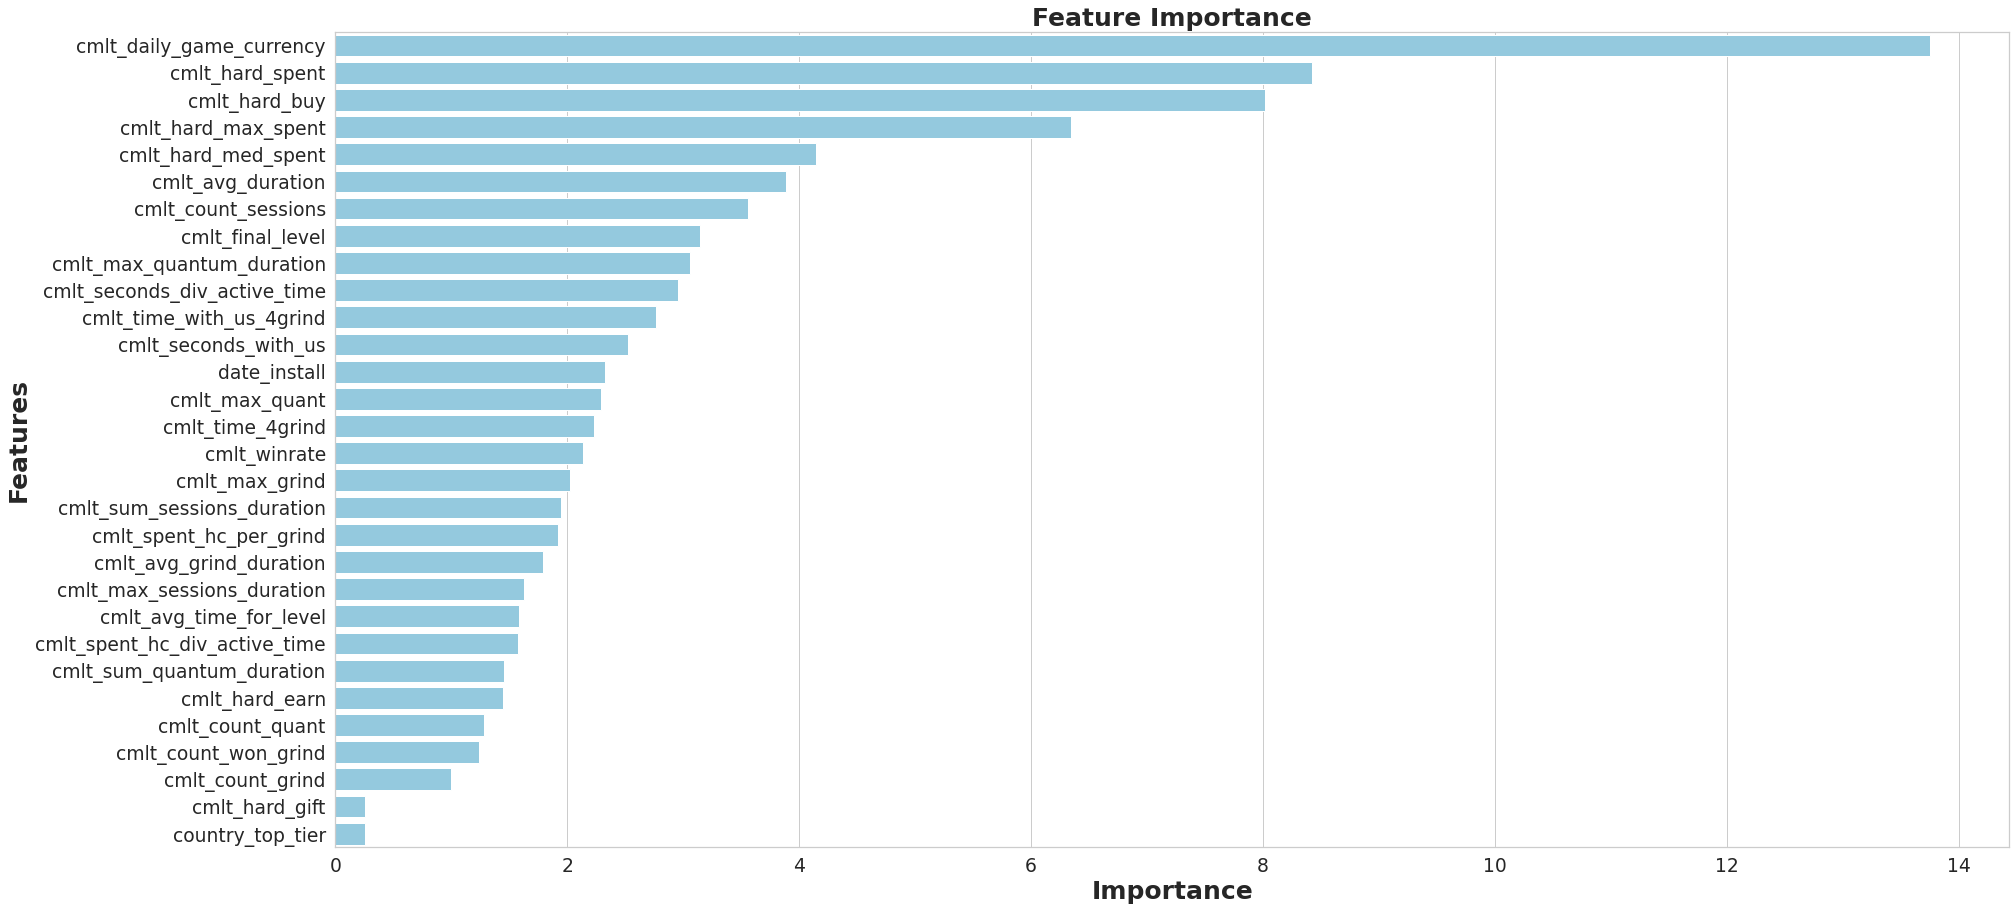

None

,Features,Gini-Importance
0,cmlt_daily_game_currency,13.747446
1,cmlt_hard_spent,8.419419
2,cmlt_hard_buy,8.012952
3,cmlt_hard_max_spent,6.346073
4,cmlt_hard_med_spent,4.148895
5,cmlt_avg_duration,3.889323
6,cmlt_count_sessions,3.558750
7,cmlt_final_level,3.148223
8,cmlt_max_quantum_duration,3.059444
9,cmlt_seconds_div_active_time,2.957643


In [72]:

feats = {}
for feature, importance in zip(X_usamp.columns[:30], model_catboost.feature_importances_[:30]):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

Optimization CatBoost

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
parameters = {'depth'         : [10, 50, 100, 500, 1000],
                 'learning_rate' : [0.01,0.02,0.03,0.04],
                  'iterations'    : [10, 20,30,40,50,60,70,80,90, 100]
                 }

In [81]:
Grid_CBC = GridSearchCV(estimator=model_catboost, param_grid = parameters, cv = 2, verbose=10, n_jobs=-1)
Grid_CBC.fit(X_usamp, normalized_y_usampl, cat_features = categorical_var)

Fitting 2 folds for each of 27 candidates, totalling 54 fits


GridSearchCV(cv=2,
             estimator=<catboost.core.CatBoostRegressor object at 0x7f5ad3c5a250>,
             n_jobs=-1,
             param_grid={'depth': [10, 50, 100], 'iterations': [100, 500, 1000],
                         'learning_rate': [0.1, 0.5, 0.8]},
             verbose=10)

In [83]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n", Grid_CBC.best_estimator_)
print("\n The best score across ALL searched params:\n", Grid_CBC.best_score_)
print("\n The best parameters across ALL searched params:\n", Grid_CBC.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:

 The best score across ALL searched params:
 nan

 The best parameters across ALL searched params:
 {'depth': 10, 'iterations': 100, 'learning_rate': 0.1}


In [61]:
model_catboost_opt = CatBoostRegressor(depth=10, iterations = 100, learning_rate = 0.1, verbose=False)

In [62]:
cum_MAE = 0
cum_MSE = 0
cum_RMSE = 0

for i, (train_index, test_index) in enumerate(kf.split(X_usamp)):
    
    # Create data for this fold
    y_train, y_valid = normalized_y_usampl.iloc[train_index], normalized_y_usampl.iloc[test_index]
    X_train, X_valid = X_usamp.iloc[train_index,:], X_usamp.iloc[test_index,:]
    print( "\nFold ", i)
    
    # Run model for this fold     
    fit_model = model_catboost.fit(X_train, y_train, cat_features = categorical_var)
    
    print( "  N trees = ", model_catboost.tree_count_ )
        
    # Generate validation predictions for this fold
    pred = fit_model.predict(X_valid)
    mae = metrics.mean_absolute_error(y_valid, pred)
    mse = mean_squared_error(y_valid, pred)
    rmse = math.sqrt(mse)

    cum_MAE += mae
    cum_MSE += mse
    cum_RMSE += rmse
print('Mean Absolute Error (MAE):', cum_MAE/K)
print('Mean Square Error (MSE):', cum_MSE/K)
print('Root Mean Square Error (RMSE):', cum_RMSE/K)


Fold  0
  N trees =  1000

Fold  1
  N trees =  1000

Fold  2
  N trees =  1000

Fold  3
  N trees =  1000

Fold  4
  N trees =  1000
Mean Absolute Error (MAE): 0.2576291394335407
Mean Square Error (MSE): 0.8534013262771272
Root Mean Square Error (RMSE): 0.9211363112168826


#####Full data

In [63]:
#normalize target
normalized_y=(y-y.mean())/y.std()

In [64]:
cum_MAE = 0
cum_MSE = 0
cum_RMSE = 0

for i, (train_index, test_index) in enumerate(kf.split(X_usamp)):
    
    # Create data for this fold
    y_train, y_valid = normalized_y.iloc[train_index], normalized_y.iloc[test_index]
    X_train, X_valid = prepare_data.iloc[train_index,:], prepare_data.iloc[test_index,:]
    print( "\nFold ", i)
    
    # Run model for this fold     
    fit_model = model_catboost.fit(X_train, y_train, cat_features = categorical_var)
    
    print( "  N trees = ", model_catboost.tree_count_ )
        
    # Generate validation predictions for this fold
    pred = fit_model.predict(X_valid)
    mae = metrics.mean_absolute_error(y_valid, pred)
    mse = mean_squared_error(y_valid, pred)
    rmse = math.sqrt(mse)

    cum_MAE += mae
    cum_MSE += mse
    cum_RMSE += rmse
print('Mean Absolute Error (MAE):', cum_MAE/K)
print('Mean Square Error (MSE):', cum_MSE/K)
print('Root Mean Square Error (RMSE):', cum_RMSE/K)


Fold  0
  N trees =  1000

Fold  1
  N trees =  1000

Fold  2
  N trees =  1000

Fold  3
  N trees =  1000

Fold  4
  N trees =  1000
Mean Absolute Error (MAE): 0.07252360673312311
Mean Square Error (MSE): 1.0925019398307274
Root Mean Square Error (RMSE): 0.8952761280877471


---
#Выводы:
1. Работал в бесплатных версиях Colab и Paperspace.
2. Целевая переменная имеет очень большой разброс. В связи с этим все применяемые алгоритмы дают значительную ошибку. После ее нормализации удалось снизить ошибку, но нормализация целевой переменной не рекомендована. Такой разброс может быть вызванн тем, что применялись различные валюты или учет велся за разное время. В первом случае нормализация при неизвестных курсах за счет среднего, во втором случае за счет времени в сети.
3. Для первоначального анализа были рассмотрены следующие алгоритмы с использованием кросс-валидации: Линейную, Дерево решений, Лассо, Ridge и k-nearest neighbors, LightGBM
4. Данные не сбалансированы по целевой переменной. Но использование семплинга привело к росту ошибки.
5. NaN значения присутствовали только колонках формата object.
6. К оптимизации рассматривал три алгоритма: Random Forest, XGBoost и CatBoost. Первые два не хватило мощности. После этого остановился только на CatBoost.
7. Попытка нормализации на наиболее скорелированные значения или время с момента инсталяции привела к росту ошибки.
8. Из всех алгоритмов у Colab хватило мощности для оптимизации только у CatBoost
9. Дальнейшие пути улучшения: созздание новых переменных из имеющихся, применения другого сэмплинга, анализ с использованием ранее удаленных колонок.